In [2]:
# 1. Classify US Representatives into democrats and republicans based on their votes on different issues
# https://archive.ics.uci.edu/ml/index.php

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set plotting style
plt.style.use('ggplot')

In [12]:
housevotes = pd.read_csv(
    'house-votes-84.data', 
    na_values='?', 
    header=None,
    names=['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution',\
    'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban',\
    'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback',\
    'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])

In [13]:
# explore data 
housevotes.head()
#housevotes.info()
#housevotes.dtypes

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [16]:
# feature engineering
housevotes = housevotes.select_dtypes(include=['object']).copy() # make new df with columns of dtype 'object'
housevotes = housevotes[~housevotes.isnull().any(axis=1)] # keep only rows without any null values
housevotes = housevotes.replace(['y', 'n'], [1, 0]) # encode 'y' and 'n' as 1 and 0
housevotes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [19]:
# train-test split
X = housevotes.drop('party', axis=1)
y = housevotes['party']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

# kNN prediction
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)
ypred = knn.predict(Xtest)

In [39]:
# model quality
print('Accuracy = %.3f' %(knn.score(Xtest, ytest)))
print('Precision - Democrat = %.3f' %(precision_score(ytest, ypred, pos_label='democrat')))
print('Precision - Republican = %.3f' %(precision_score(ytest, ypred, pos_label='republican')))
print('Recall - Democrat = %.3f' %(recall_score(ytest, ypred, pos_label='democrat')))
print('Recall - Republican = %.3f' %(recall_score(ytest, ypred, pos_label='republican')))

Accuracy = 0.957
Precision - Democrat = 0.972
Precision - Republican = 0.941
Recall - Democrat = 0.946
Recall - Republican = 0.970


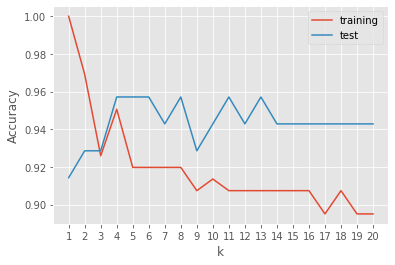

In [40]:
# model quality vs. k (no. neighbors)
nneighbors = np.arange(1, 21)
train_acc = []
test_acc = []

for i, k in enumerate(nneighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    train_acc.append(knn.score(Xtrain, ytrain))
    test_acc.append(knn.score(Xtest, ytest))

# plot accuracy vs. n. neighbors to explore under-/overfitting
plt.figure()
plt.plot(nneighbors, train_acc, label='training')
plt.plot(nneighbors, test_acc, label='test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(nneighbors)
plt.legend()
plt.show()